# Topic Modelling

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('UPN_Search_2021.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (0,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df.head()

,person_internal_id,client_id,platform_id,search_text,search_results,Unnamed: 5
0,424490056.0,7961,7961,upload dependents,16,NaN
1,477120007.0,8666,8666,Paying for your benefits,76,NaN
2,229000085.0,936,936,sign%20up%20for%20insurance,46,NaN
3,218900005.0,749,749,Hyatt%20legal,6,NaN
4,NaN,15757,15757,NaN,1043,NaN


In [11]:
df1 = df[['search_text']]

In [12]:
df1.head()

,search_text
0,upload dependents
1,Paying for your benefits
2,sign%20up%20for%20insurance
3,Hyatt%20legal
4,NaN


In [13]:
df1 = df1.dropna()

In [14]:
df1.shape

(1043971, 1)

In [15]:
import nltk
from nltk.corpus import stopwords

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
cv = CountVectorizer(max_df = 0.9,min_df =2, stop_words ='english')

In [18]:
dtm = cv.fit_transform(df1['search_text'])

In [19]:
dtm

<1043971x21252 sparse matrix of type '<class 'numpy.int64'>'
	with 1769849 stored elements in Compressed Sparse Row format>

In [20]:
from sklearn.decomposition import LatentDirichletAllocation

In [21]:
LDA = LatentDirichletAllocation(n_components=7,random_state=42)

In [22]:
LDA.fit(dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=7, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [23]:
len(cv.get_feature_names())

21252

In [24]:
single_topic = LDA.components_[0]

In [25]:
single_topic.argsort()

array([ 8854,  8853,  8850, ..., 11943, 18889, 19335])

In [61]:
top_ten_words = single_topic.argsort()[-10:]

In [62]:
for index in top_ten_words:
    print(cv.get_feature_names()[index])

2021
benefit
vision
401
pto
legal
enrollment
holiday
statement
tax


In [63]:
for i,topic in enumerate(LDA.components_):
    print(f'The top 10 words per topic#{i}')
    print([cv.get_feature_names()[index] for index in topic.argsort()[-10:]])
    print('\n')

The top 10 words per topic#0
['2021', 'benefit', 'vision', '401', 'pto', 'legal', 'enrollment', 'holiday', 'statement', 'tax']


The top 10 words per topic#1
['roth', 'mint', 'payroll', 'wellness', 'balance', 'cobra', 'learnet', '1095', 'time', 'loan']


The top 10 words per topic#2
['retiree', 'absence', 'hardship', 'withdrawal', 'withdraw', 'deposit', 'direct', 'health', 'leave', '401k']


The top 10 words per topic#3
['cards', 'id', 'medical', 'reimbursement', 'paycheck', 'retirement', 'discount', 'search_spdelig', 'forms', 'card']


The top 10 words per topic#4
['contact', 'bereavement', 'employee', 'form', '1099', 'change', 'covid', 'hsa', 'w2', 'pay']


The top 10 words per topic#5
['number', 'term', 'disability', 'account', 'spd', 'verification', 'life', 'rollover', 'dependent', 'insurance']


The top 10 words per topic#6
['20of', 'payment', '20insurance', 'vacation', 'loans', 'upload', 'dental', 'pension', 'plan', 'benefits']




In [64]:
topic_results = LDA.transform(dtm)

In [65]:
topic_results[0].argmax()

6

In [66]:
df1['Topic'] = topic_results.argmax(axis=1)

In [67]:
df1.head()

,search_text,Topic
0,upload dependents,6
1,Paying for your benefits,6
2,sign%20up%20for%20insurance,1
3,Hyatt%20legal,1
5,W-2,0


In [68]:
df1.groupby('Topic').count().sort_values(by='search_text',ascending=False)

,search_text
Topic,
0,167323
4,160298
5,148813
3,147524
6,144023
1,139682
2,136308


In [69]:
data = {'Topic':[0,1,2,3,4,5,6],
        'Top 10 words':[['2021', 'benefit', 'vision', '401', 'pto', 'legal', 'enrollment', 'holiday', 'statement', 'tax'],
                        ['roth', 'mint', 'payroll', 'wellness', 'balance', 'cobra', 'learnet', '1095', 'time', 'loan'],
                        ['retiree', 'absence', 'hardship', 'withdrawal', 'withdraw', 'deposit', 'direct', 'health', 'leave', '401k'],
                        ['cards', 'id', 'medical', 'reimbursement', 'paycheck', 'retirement', 'discount', 'search_spdelig', 'forms', 'card'],
                        ['contact', 'bereavement', 'employee', 'form', '1099', 'change', 'covid', 'hsa', 'w2', 'pay'],
                        ['number', 'term', 'disability', 'account', 'spd', 'verification', 'life', 'rollover', 'dependent', 'insurance'],
                        ['20of', 'payment', '20insurance', 'vacation', 'loans', 'upload', 'dental', 'pension', 'plan', 'benefits']]}

In [70]:
words = pd.DataFrame(data) 

In [71]:
final_dataframe = df1.merge(words)

In [72]:
final_dataframe.head()

,search_text,Topic,Top 10 words
0,upload dependents,6,"[20of, payment, 20insurance, vacation, loans, ..."
1,Paying for your benefits,6,"[20of, payment, 20insurance, vacation, loans, ..."
2,gxp,6,"[20of, payment, 20insurance, vacation, loans, ..."
3,delete%20alerts,6,"[20of, payment, 20insurance, vacation, loans, ..."
4,benefits,6,"[20of, payment, 20insurance, vacation, loans, ..."


In [32]:
final_dataframe.to_csv('NLP_Output.csv')

# Topic Modelling using gensim

In [33]:
import re

In [34]:
df2 = df[['search_text']]

In [35]:
df2.head()

,search_text
0,upload dependents
1,Paying for your benefits
2,sign%20up%20for%20insurance
3,Hyatt%20legal
4,NaN


In [36]:
df2 = df2.dropna()

In [37]:
df2['search_text_clean'] = df2['search_text'].map(lambda x: re.sub('[,\.!?%#]', ' ', x))

In [38]:
df2['search_text_clean'] = df2['search_text'].map(lambda x: x.lower())

In [39]:
df2.head()

,search_text,search_text_clean
0,upload dependents,upload dependents
1,Paying for your benefits,paying for your benefits
2,sign%20up%20for%20insurance,sign%20up%20for%20insurance
3,Hyatt%20legal,hyatt%20legal
5,W-2,w-2


In [40]:
df2 = df2.drop(columns=['search_text'],axis=1)

In [41]:
df2 = df2.rename(columns={'search_text_clean':'search_text'})

In [42]:
df2.head()

,search_text
0,upload dependents
1,paying for your benefits
2,sign%20up%20for%20insurance
3,hyatt%20legal
5,w-2


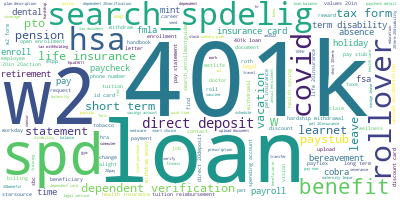

In [43]:
# Import the wordcloud library
from wordcloud import WordCloud
long_string = ','.join(list(df2['search_text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=5, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [45]:
#!pip install gensim==3.8.3

In [46]:
import gensim
from gensim.utils import simple_preprocess
import nltk

In [47]:
stop_words = pd.read_csv('nltk_data/english')

In [48]:
#deacc = True removes punctuation
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [49]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

In [50]:
data = df2.search_text.values.tolist()
data_words = list(sent_to_words(data))

In [51]:
# remove stop words
data_words = remove_stopwords(data_words)

In [52]:
print(data_words[:4])

[['upload', 'dependents'], ['paying', 'for', 'your', 'benefits'], ['sign', 'up', 'for', 'insurance'], ['hyatt', 'legal']]


In [53]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [54]:
print(corpus[:1])

[[(0, 1), (1, 1)]]


In [55]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['upload', 'dependents']


In [56]:
print(trigram_mod[bigram_mod[data_words[5]]])

['view', 'last', 'pay', 'stub']


In [57]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [58]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

In [42]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

NameError: name 'make_bigrams' is not defined

In [64]:
import certifi
certifi.where()

'/opt/conda/lib/python3.9/site-packages/certifi/cacert.pem'

In [74]:
import os

import sys

import certifi

os.environ['REQUESTS_CA_BUNDLE'] = os.path.join(os.path.dirname(sys.argv[0]), certifi.where())

In [41]:
#!pip --cert /opt/conda/lib/python3.9/site-packages/certifi/cacert.pem install spacy

In [89]:
!python -m spacy download en_core_web_sm

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
2023-01-04 16:05:15.470827: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-04 16:05:15.470870: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-04 16:05:17.310743: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-04 16:05:17.310788: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-04 16:05:17.310816: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (adl-core-custom-dock-ml-t3-2xlarge-bc495710f2d34

In [83]:
#!pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org pip setuptools

In [9]:
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

ModuleNotFoundError: No module named 'spacy'

In [10]:
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

NameError: name 'lemmatization' is not defined

In [ ]:
from pprint import pprint
# number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

# Compute Model perplexity and coherence score

In [ ]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

In [ ]:
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

# LDA MAllet

In [ ]:
from gensim.test.utils import common_corpus, common_dictionary 
import os 
import gensim
#os.environ.update({'MALLET_HOME': '#!new_mallet/mallet-2.0.8/'})
#os.environ.get('MALLET_HOME', 'Not Set')
os.environ["MALLET_HOME"] = 'mallet-2.0.8/'
mallet_path = 'mallet-2.0.8/bin/mallet'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path=mallet_path,corpus=corpus, num_topics=15, id2word=id2word) #,prefix='temp_file_', workers=4

In [ ]:
print(ldamallet.show_topics(formatted=False))

In [ ]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=3, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=[data], start=3, limit=15, step=3)

In [ ]:
import matplotlib.pyplot as plt
limit=15; start=3; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [ ]:
# Select the model and print the topics
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

In [ ]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

In [ ]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

In [ ]:
# Select the model and print the topics
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))